Brief Description
This dataset reflects real predictive maintenance encountered in the industry with measurements from real equipment. The features description is taken directly from the dataset source.

The six features are:
* Type: the quality of the product, consisting of a letter L, M, or H. Meaning low, medium, and high, respectively.
* Air temperature [K]: generated using a random walk process later normalized to a standard deviation of 2 K around 300 K.
* Process temperature [K]: generated using a random walk process normalized to a standard deviation of 1 K, added to the air temperature
plus 10 K.
* Rotational speed [rpm]: calculated from power of 2860 W, overlaid with a normally distributed noise.
* Torque [Nm]: torque values are normally distributed around 40 Nm with an Ïƒ = 10 Nm and no negative values.  (Power (P) = Speed (n) x Torque (M).)
* Tool wear [minutes]: The quality variants H/M/L add 5/3/2 minutes of tool wear to the used tool in the process.

The targets are:
* Target: failure or no failure (to perform binary classification).
* Failure Type: type of failure (to perform multiclass classification).

It also includes the following information, which is not useful for building the models:
UID: unique identifier ranging from 1 to 10000.
ProductID: the id of the product.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

In [ ]:
df=pd.read_csv("https://raw.githubusercontent.com/KISHOREVD/Machine_learning_projects/main/predictive_maintenance.csv")
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


In [ ]:
df.shape

(10000, 10)

In [ ]:
df.describe()

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900
std,2886.89568,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981
min,1.00000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000
25%,2500.75000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000
50%,5000.50000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000
75%,7500.25000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000
max,10000.00000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000


# Data Cleaning 

Droping unnecessary columns

In [ ]:
# we can see the UID and product ID column is unique hence it will cause overfit lets drop them
df.drop(["UDI","Product ID"],axis=1,inplace=True)

In [ ]:
df.columns

Index(['Type', 'Air temperature [K]', 'Process temperature [K]',
       'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]', 'Target',
       'Failure Type'],
      dtype='object')

In [ ]:
#Renaming the columns for easy access
df=df.rename(columns={'Air temperature [K]':"air_temperature",'Process temperature [K]':"process_temperature",
       'Rotational speed [rpm]':"rotational_speed", 'Torque [Nm]':"torque", 'Tool wear [min]':"tool_wear","Failure Type":"failure_type"})

In [ ]:
# Renaming all the column names in lowercase letters
df.columns = df.columns.str.lower()

In [ ]:
df.columns

Index(['type', 'air_temperature', 'process_temperature', 'rotational_speed',
       'torque', 'tool_wear', 'target', 'failure_type'],
      dtype='object')



Handling Missing value


In [ ]:
df.isnull().sum()   #no null values in the dataset 

type                   0
air_temperature        0
process_temperature    0
rotational_speed       0
torque                 0
tool_wear              0
target                 0
failure_type           0
dtype: int64

In [ ]:
#from the description we can see tool wear in minuteas has 0 values 
df[df["tool_wear"]==0].shape  #so 120 rows out of 10000 rows has 0 tool wear min so we can drop them 

(120, 8)

In [ ]:
df=df[~(df["tool_wear"]==0)]

In [ ]:
df.shape  #120 rows deleted

(9880, 8)

In [ ]:
df.describe() # min value of tool_wear is no 2 minutes 

,air_temperature,process_temperature,rotational_speed,torque,tool_wear,target
count,9880.000000,9880.000000,9880.000000,9880.000000,9880.000000,9880.000000
mean,300.005516,310.006164,1538.944433,39.978715,109.262146,0.034008
std,2.000113,1.483590,179.581327,9.977527,62.911009,0.181259
min,295.300000,305.700000,1168.000000,3.800000,2.000000,0.000000
25%,298.300000,308.800000,1423.000000,33.200000,55.000000,0.000000
50%,300.100000,310.100000,1503.000000,40.100000,109.000000,0.000000
75%,301.500000,311.100000,1612.000000,46.800000,163.000000,0.000000
max,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000


Formatting Error

In [ ]:
df.dtypes   #all the datatype values is correct 

type                    object
air_temperature        float64
process_temperature    float64
rotational_speed         int64
torque                 float64
tool_wear                int64
target                   int64
failure_type            object
dtype: object

In [ ]:
df["type"].unique()   #type of tool is given low/medium/high carbon steel tool 

array(['L', 'M', 'H'], dtype=object)

In [ ]:
df["target"].unique()   # 0 means no failure # 1 means failure

array([0, 1])

In [ ]:
df["failure_type"].unique()  #failure_type contains all type of failure in organisation

array(['No Failure', 'Power Failure', 'Tool Wear Failure',
       'Overstrain Failure', 'Random Failures',
       'Heat Dissipation Failure'], dtype=object)

**Lets create new dataframe for failure type as target multiclass classification **

In [ ]:
df_failtype_no=df[df["target"]==0]   # target==0 is the no failure 

In [ ]:
df_failtype_no["target"].unique()

array([0])

In [ ]:
df_failtype_no["failure_type"].unique()    #random failure is present we want so when we filter target==1 then random failure will disappear

array(['No Failure', 'Random Failures'], dtype=object)

In [ ]:
df_failtype_no.drop(["target"],axis=1,inplace=True)

In [ ]:
df_failtype_no.head()   #this dataframe is used for Multi class classification 

,type,air_temperature,process_temperature,rotational_speed,torque,tool_wear,failure_type
1,L,298.2,308.7,1408,46.3,3,No Failure
2,L,298.1,308.5,1498,49.4,5,No Failure
3,L,298.2,308.6,1433,39.5,7,No Failure
4,L,298.2,308.7,1408,40.0,9,No Failure
5,M,298.1,308.6,1425,41.9,11,No Failure


In [ ]:
df_failtype_no["failure_type"].value_counts()  # we can drop rows with random failure 

No Failure         9526
Random Failures      18
Name: failure_type, dtype: int64

In [ ]:
df_failure=df[(df["target"]==1) & (~(df["failure_type"].isin(["Random Failures","No Failure"])))]   # no failure is present in failure_type column even when target=1

In [ ]:
df_failure.failure_type.unique()

array(['Power Failure', 'Tool Wear Failure', 'Overstrain Failure',
       'Heat Dissipation Failure'], dtype=object)

In [ ]:
df_failure.drop(["target"],axis=1,inplace=True)

# Exploratory Data analysis 

The targets features are:

* target: failure or no failure (to perform binary classification).
* failure_type: type of failure (to perform multiclass classification).


with df table as target to be predicted

Plotting of Numerical data vs target(failure or no failure)

In [ ]:
df.drop(["failure_type"],axis=1,inplace=True)

In [ ]:
df["target"].unique()   # 0 means no failure     # 1 means failure

array([0, 1])

In [ ]:
print(df["target"].value_counts())
print("Percentage of 0(no failure class) : ", df["target"].value_counts()[0]*100/df["target"].value_counts().sum())
print("Percentage of 1(failure class) : " ,df["target"].value_counts()[1]*100/df["target"].value_counts().sum())
#this is Highly imbalanced data

0    9544
1     336
Name: target, dtype: int64
Percentage of 0(no failure class) :  96.59919028340082
Percentage of 1(failure class) :  3.4008097165991904


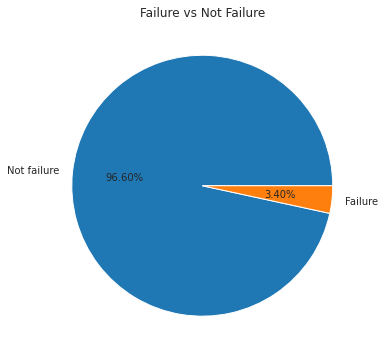

In [ ]:
plt.figure(figsize=(6,6))
plt.pie(df.target.value_counts(),labels=["Not failure","Failure"],autopct="%1.2f%%")
plt.title("Failure vs Not Failure")
plt.show() #this is Highly imbalanced data

In [ ]:
df.columns

Index(['type', 'air_temperature', 'process_temperature', 'rotational_speed',
       'torque', 'tool_wear', 'target'],
      dtype='object')

In [ ]:
df.shape   #df has 9880 rows and 7column

(9880, 7)

In [ ]:
import warnings
warnings.filterwarnings("ignore")   #to ignore the warning

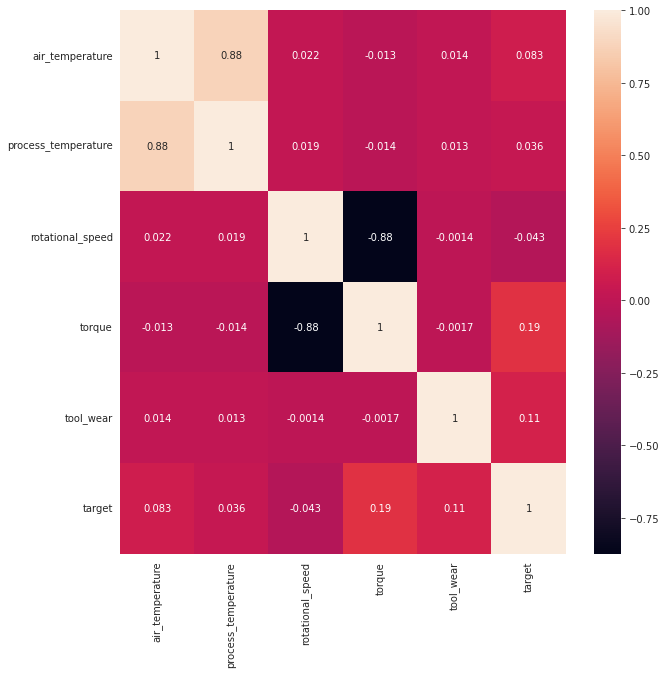

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True)
plt.show()  #checks only linear relationship

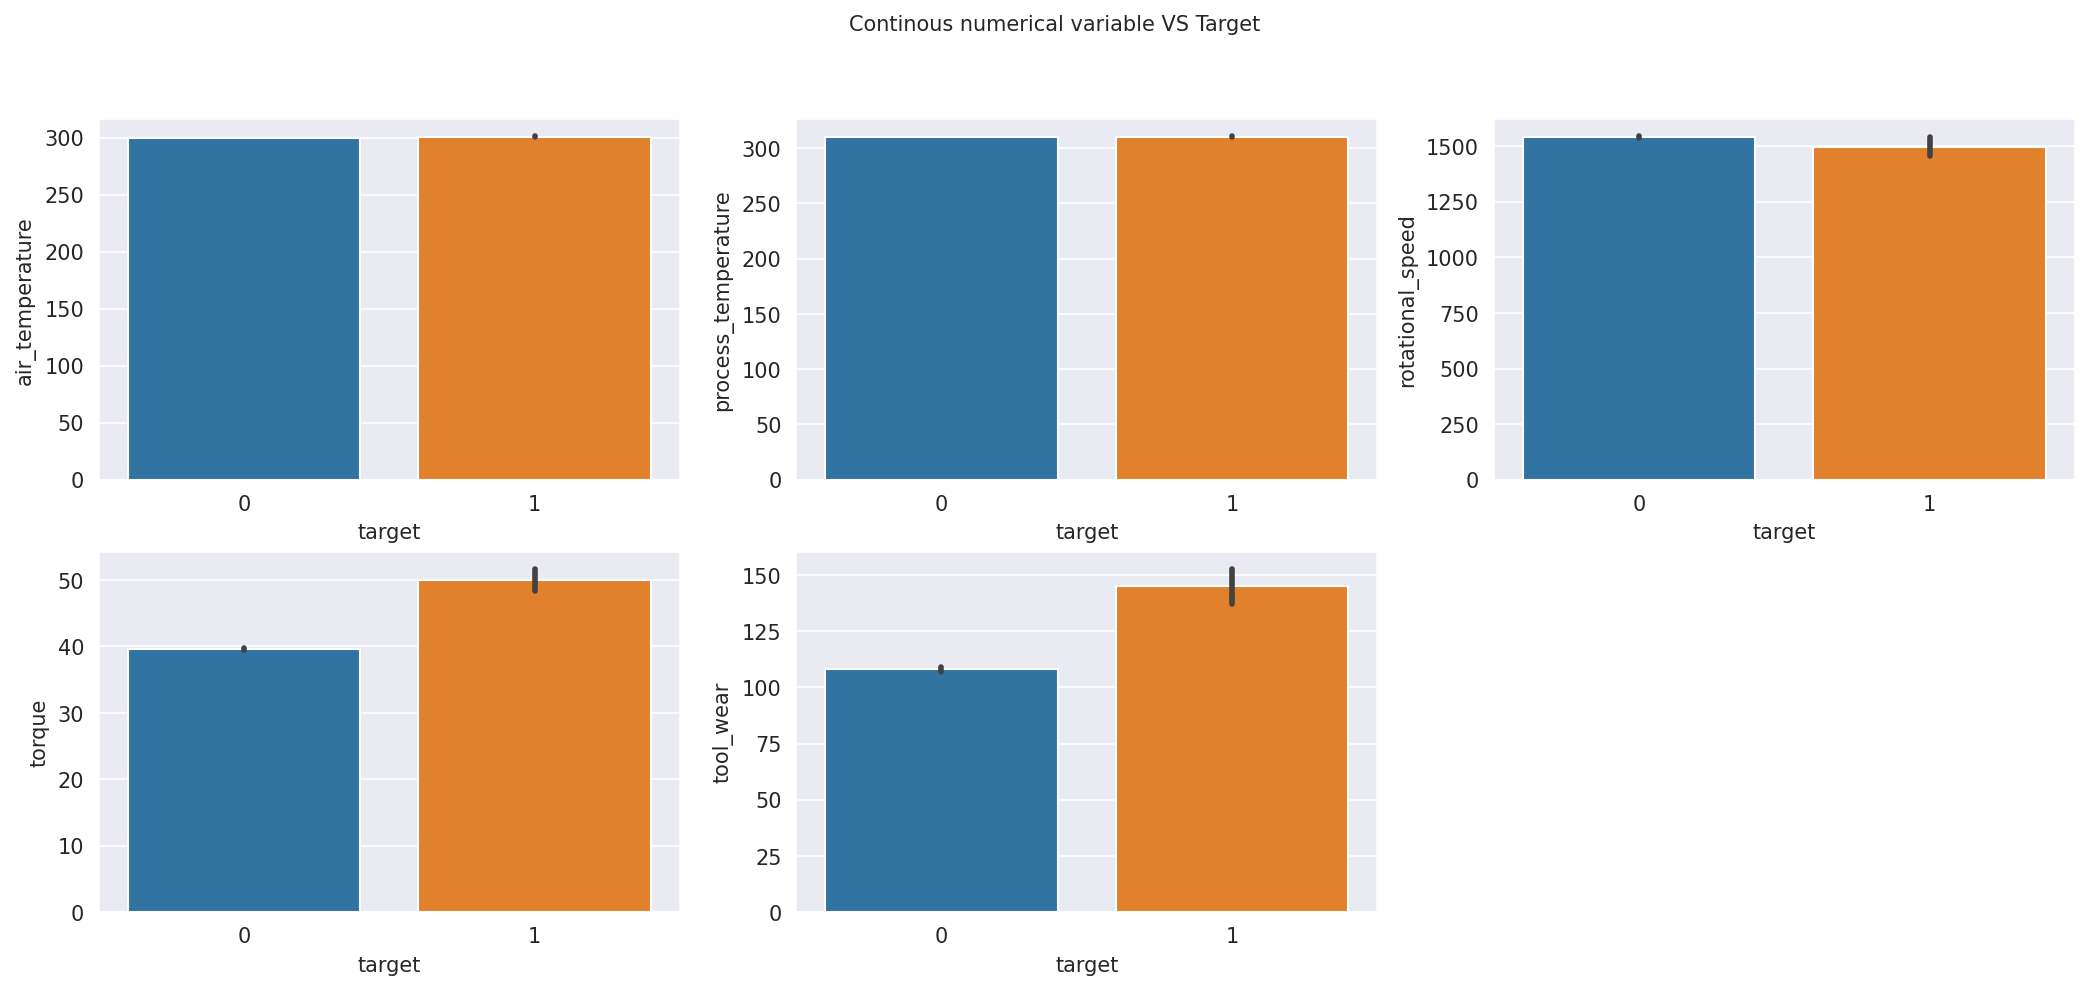

In [ ]:
sns.set_style(style="darkgrid")
plt.figure(figsize=(17,7), dpi=150)
#regplot--->plot data and a linear regression model fit.
plt.subplot(2,3,1)
sns.barplot( df.target,df.air_temperature)

plt.subplot(2,3,2)
sns.barplot(df.target,df.process_temperature)

plt.subplot(2,3,3)
sns.barplot(df.target, df.rotational_speed)

plt.subplot(2,3,4)
sns.barplot(df.target,df.torque)

plt.subplot(2,3,5)
sns.barplot( df.target,df.tool_wear)

plt.suptitle("Continous numerical variable VS Target", fontsize=10)  #suptitle to show title for overall plot 
plt.show()



Interpretation
* air_temperature is not a major cause of failure
* process_temperature is not a major cause of failure
* rotational speed is not a major cause of failure
* Torque is a major cause of failure-Higher the torque Higher the failure
* Tool_wear is a major cause of failure-Higher the tool_wear Higher the failure

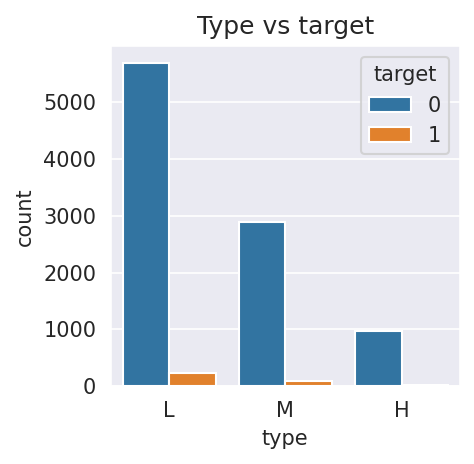

In [ ]:
plt.figure(figsize=(3,3), dpi=150)
sns.countplot(x="type",data=df,hue='target')
plt.title("Type vs target")
plt.show()
# we can observe with respect to  low has highest failure ,then medium and high 

Interpretation
* we can observe with respect to target low has high failure ,then medium and high 

**Plotting of Numerical data vs failure_type**

For to be predicted :failure _type(multi class classification)


In [ ]:
df_failure.columns

Index(['type', 'air_temperature', 'process_temperature', 'rotational_speed',
       'torque', 'tool_wear', 'failure_type'],
      dtype='object')

In [ ]:
df_failure.shape   # has 327 rows and 7 columns 

(327, 7)

In [ ]:
print(df_failure["failure_type"].unique())
print("\n")
print(f"There are {df_failure['failure_type'].nunique()}  failure types")


['Power Failure' 'Tool Wear Failure' 'Overstrain Failure'
 'Heat Dissipation Failure']


There are 4  failure types


In [ ]:
for_pie1=df_failure["failure_type"].value_counts().reset_index().rename(columns={"index":"failure_type","failure_type":"count"})
for_pie1

,failure_type,count
0,Heat Dissipation Failure,112
1,Power Failure,92
2,Overstrain Failure,78
3,Tool Wear Failure,45


In [ ]:
import plotly.express as px
fig = px.pie(for_pie1, values='count', names='failure_type', title='Failure_type')
fig.show()

#failure type data is not a imbalanced data 

Text(0.5, 1.0, 'Type Vs torque')

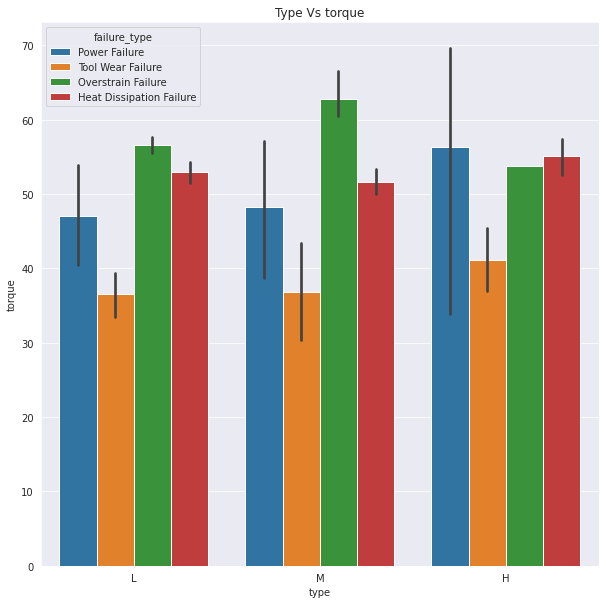

In [ ]:
plt.figure(figsize=(10,10))
sns.barplot(x="type",y="torque",data=df_failure,hue="failure_type")
plt.title("Type Vs torque")

#overstrain failure occurs with higher torque in case of L,M,H type tools 
#tool wear failure is lowest in case of all L,M,H type

Text(0.5, 1.0, 'failure_type VS rotational_speed')

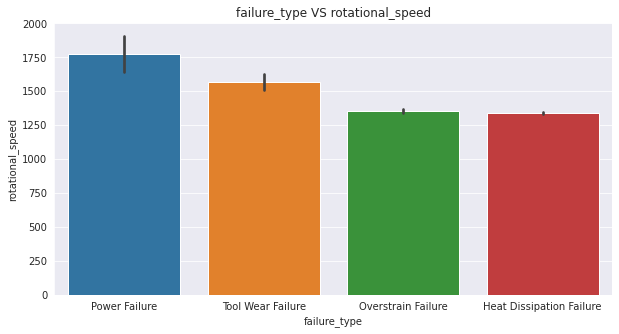

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(x="failure_type",y="rotational_speed",data=df_failure)
plt.title("failure_type VS rotational_speed")

#Power failure id caused the highest by rotational speed

Text(0.5, 1.0, 'Type Vs rotational_speed')

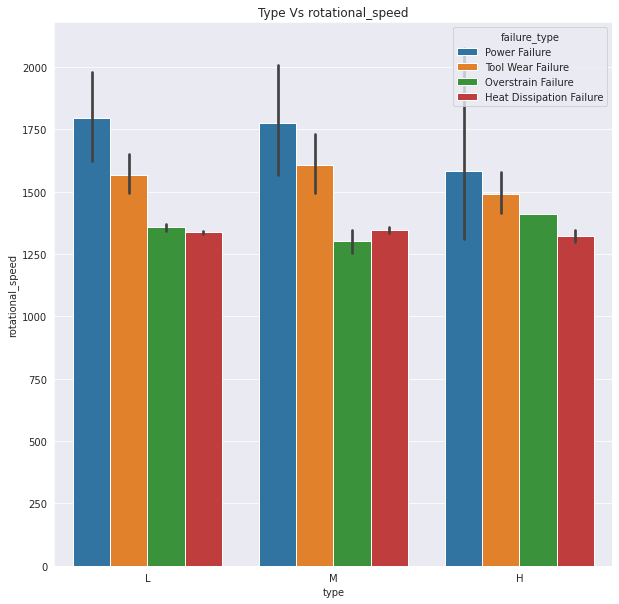

In [ ]:
plt.figure(figsize=(10,10))
sns.barplot(x="type",y="rotational_speed",data=df_failure,hue="failure_type")
plt.title("Type Vs rotational_speed")

Text(0.5, 1.0, 'failure_type VS process_temperature')

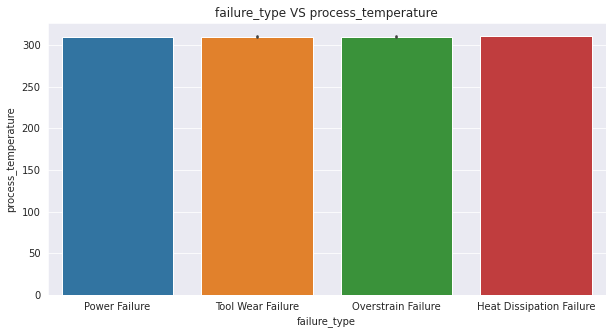

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(x="failure_type",y="process_temperature",data=df_failure)
plt.title("failure_type VS process_temperature")

Text(0.5, 1.0, 'failure_type VS air_temperature')

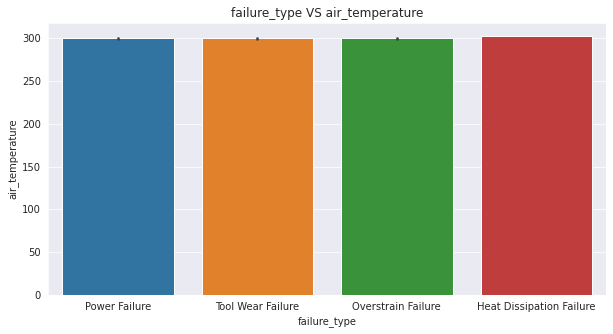

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(x="failure_type",y="air_temperature",data=df_failure)
plt.title("failure_type VS air_temperature")

# Encoding the data 

In [ ]:
df["type"].unique()

array(['L', 'M', 'H'], dtype=object)

In [ ]:
# we can do label encoding for type as it is ordinal
df["type"]=df["type"].map({"L":1,"M":2,"H":3})
df_failure["type"]=df_failure["type"].map({"L":1,"M":2,"H":3})

In [ ]:
df_failure["failure_type"].value_counts().sort_values()  #data is ordinal thats why we do label encoding 

Tool Wear Failure            45
Overstrain Failure           78
Power Failure                92
Heat Dissipation Failure    112
Name: failure_type, dtype: int64

In [ ]:
#we do label encoding because of the ordianl nature of target failure_type
df_failure["failure_type"]=df_failure["failure_type"].map({"Tool Wear Failure":1,"Overstrain Failure":2,"Power Failure":3,"Heat Dissipation Failure":4})

# Splitting the data 

In [ ]:
df.columns.to_list()

['type',
 'air_temperature',
 'process_temperature',
 'rotational_speed',
 'torque',
 'tool_wear',
 'target']

In [ ]:
X_bin=df.iloc[:,:-1]
y_bin=df.iloc[:,-1]

**Balancing the imbalanced dataset**

In [ ]:
#Balancing the data with SMOTE(synthetic minority oversampling technique) and cluster centroid undersampling 
from imblearn.combine import SMOTEENN   
smt = SMOTEENN(sampling_strategy='all')  #initialize  #sampling_strategy=all means both minority and majority
X_smt, y_smt = smt.fit_resample(X_bin, y_bin)

In [ ]:
#for Binary classification splitting 
from sklearn.model_selection import train_test_split
X_trainb, X_testb, y_trainb, y_testb = train_test_split(X_smt, y_smt, test_size=0.2)

In [ ]:
type(X_trainb)

pandas.core.frame.DataFrame

In [ ]:
X_mul=df_failure.iloc[:,:-1]
y_mul=df_failure.iloc[:,-1]

In [ ]:
from sklearn.model_selection import train_test_split
X_trainm, X_testm, y_trainm, y_testm = train_test_split(X_mul, y_mul, test_size=0.2)

In [ ]:
type(X_trainm)

pandas.core.frame.DataFrame

# Scaling the data

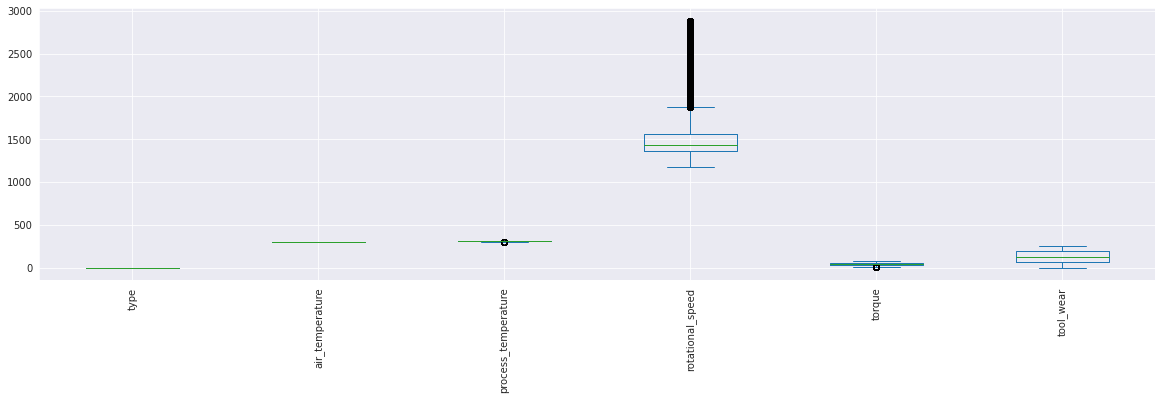

In [ ]:
pd.DataFrame(X_trainb, columns=X_trainb.columns).plot.box(figsize=(20,5), rot=90)
plt.show()  #lets scale both the datasets

#no outlier removal beacuse 
#it seems it have outlier in rotational speed it is very much possible for acheiving high production rate operator may have run in high speeds

In [ ]:
type(X_trainb)

pandas.core.frame.DataFrame

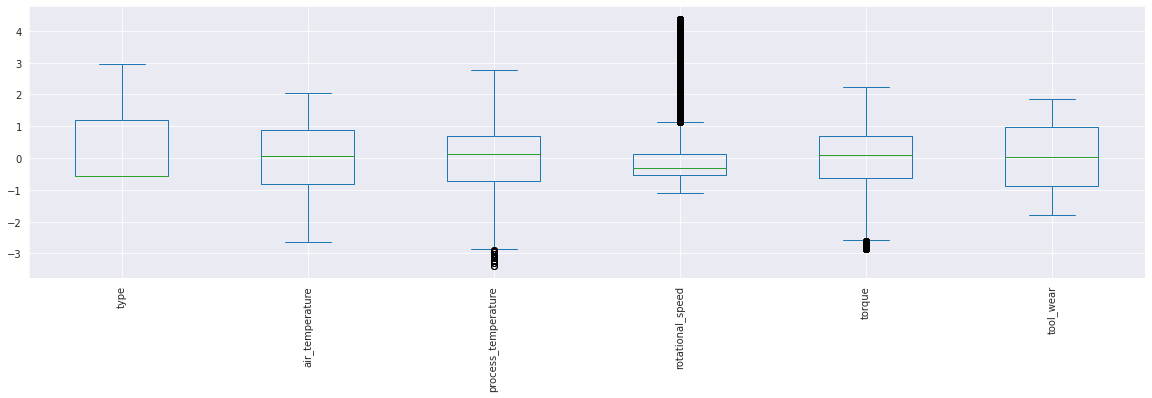

In [ ]:
#for binary classification
from sklearn.preprocessing import StandardScaler  #x-mean/std
ss = StandardScaler().fit(X_trainb)
X_trainbs = ss.transform(X_trainb)
X_trainbs = pd.DataFrame(X_trainbs, columns=X_trainb.columns)
X_testbs = ss.transform(X_testb)
X_testbs = pd.DataFrame(X_testbs, columns=X_testb.columns)
X_trainbs.plot.box(figsize=(20,5), rot=90)
plt.show()

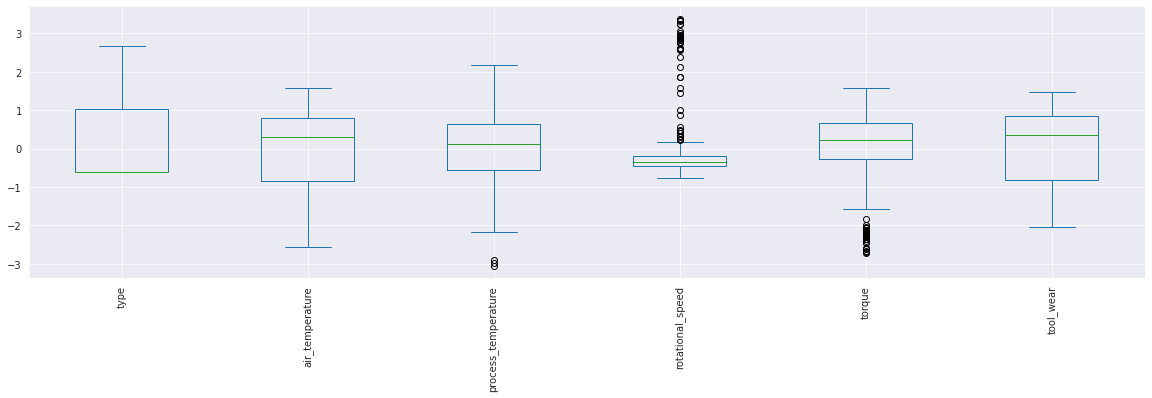

In [ ]:
#for multi class classification 
from sklearn.preprocessing import StandardScaler  #x-mean/std
ss = StandardScaler().fit(X_trainm)
X_trainms = ss.transform(X_trainm)
X_trainms = pd.DataFrame(X_trainms, columns=X_trainm.columns)
X_testms = ss.transform(X_testm)
X_testms = pd.DataFrame(X_testms, columns=X_testm.columns)
X_trainms.plot.box(figsize=(20,5), rot=90)
plt.show()

# Training the model for binary classification

**LOGISTIC REGRESSION**


In [ ]:
from sklearn.linear_model import LogisticRegression #main code that build the LR model 
logistic_regression= LogisticRegression() #initiating the model 
logistic_regression.fit(X_trainbs,y_trainb) #training 

LogisticRegression()

In [ ]:
y_pred=logistic_regression.predict(X_testbs)

In [ ]:
from sklearn.metrics import f1_score
log_reg_f1=f1_score(y_testb,y_pred) 
print("f1 score for logistic regression :  ",round(log_reg_f1,2))

# we get good f1 score 

f1 score for logistic regression :   0.86


In [ ]:
from sklearn.metrics import roc_auc_score
log_reg_auroc=roc_auc_score(y_testb,y_pred)
print("auroc score for logistic regression  :  ",round(log_reg_auroc,2))

auroc score for logistic regression  :   0.85


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_testb, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.84      0.84      1616
           1       0.86      0.86      0.86      1833

    accuracy                           0.85      3449
   macro avg       0.85      0.85      0.85      3449
weighted avg       0.85      0.85      0.85      3449



In [ ]:
from sklearn.metrics import  confusion_matrix
confusion_matrix(y_testb,y_pred)

array([[1359,  257],
       [ 261, 1572]])

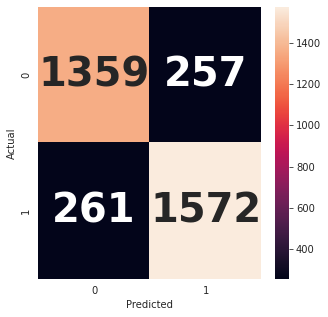

In [ ]:
confusion_matrix = pd.crosstab(y_testb, y_pred, rownames=['Actual'], colnames=['Predicted'])
fig, ax = plt.subplots(figsize=(5,5))
sns.heatmap(confusion_matrix, annot=True,annot_kws={"size": 40, "weight": "bold"}, fmt='d')  # fmt=d makes it to display values in heatmap in numbers

**KNN CLASSIFIER**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
#doing cross validation to identify best value of K 
from sklearn.model_selection import cross_val_score
for i in [1,2,3,4,5,6,7,8,9,10,20,50]:  #for each k value finding the auroc 
  knn = KNeighborsClassifier(i) #initialising the model
  knn.fit(X_trainbs,y_trainb) # training the model
  trainAccuracy = accuracy_score(y_trainb, knn.predict(X_trainbs))
  print("K value  : " , i,"Train accuracy :",trainAccuracy, " cross val score : ", np.mean(cross_val_score(knn, X_trainbs, y_trainb, cv=10)))

K value  :  1 Train accuracy : 1.0  cross val score :  0.9794127754831793
K value  :  2 Train accuracy : 0.9968104385646973  cross val score :  0.9778180996521317
K value  :  3 Train accuracy : 0.9855744835085176  cross val score :  0.9720177927714897
K value  :  4 Train accuracy : 0.9855019934758971  cross val score :  0.9731782640224484
K value  :  5 Train accuracy : 0.9787604204421892  cross val score :  0.9680317074965055
K value  :  6 Train accuracy : 0.9802102210945995  cross val score :  0.9702063562127566
K value  :  7 Train accuracy : 0.9739760782892353  cross val score :  0.9657121312440227
K value  :  8 Train accuracy : 0.9762232693004712  cross val score :  0.9660743449884919
K value  :  9 Train accuracy : 0.9712939470822762  cross val score :  0.9625225168416517
K value  :  10 Train accuracy : 0.9723088075389634  cross val score :  0.9630299208626288
K value  :  20 Train accuracy : 0.958173251177963  cross val score :  0.9502713056089794
K value  :  50 Train accuracy : 0.9

In [ ]:
# at k=2 we get good cross val score 
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=2)  #initialized 
classifier.fit(X_trainbs,y_trainb)

KNeighborsClassifier(n_neighbors=2)

In [ ]:
y_pred=classifier.predict(X_testbs)

In [ ]:
y_pred  #gives 1 or 0

array([0, 0, 1, ..., 0, 1, 0])

In [ ]:
from sklearn.metrics import f1_score
KNN_f1=f1_score(y_testb,y_pred) 
print("f1 score for KNN  :  ",round(KNN_f1,2))

# we get good f1 score 

f1 score for KNN  :   0.98


In [ ]:
from sklearn.metrics import roc_auc_score
KNN_auroc=roc_auc_score(y_testb,y_pred)
print("auroc score for KNN  :  ",round(KNN_auroc,2))

auroc score for KNN  :   0.98


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_testb, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.97      0.97      1616
           1       0.97      0.98      0.98      1833

    accuracy                           0.98      3449
   macro avg       0.98      0.98      0.98      3449
weighted avg       0.98      0.98      0.98      3449



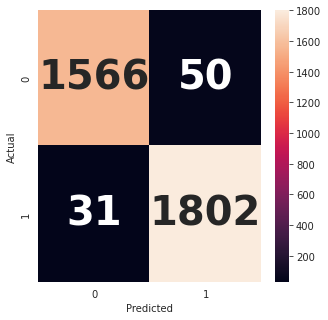

In [ ]:
confusion_matrix = pd.crosstab(y_testb, y_pred, rownames=['Actual'], colnames=['Predicted'])
fig, ax = plt.subplots(figsize=(5,5))
sns.heatmap(confusion_matrix, annot=True,annot_kws={"size": 40, "weight": "bold"}, fmt='d')

**DECISION TREE CLASSIFIER**

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
#doing cross validation to get best value of max _depth to prevent overfitted model 
from sklearn.model_selection import cross_val_score 
from sklearn.tree import DecisionTreeClassifier
for depth in [1,2,3,4,5,6,7,8,9,10,20]:
  dt = DecisionTreeClassifier(max_depth=depth) # will tell the DT to not grow past the given threhsold
  # Fit dt to the training set
  dt.fit(X_trainbs, y_trainb) # the model is trained
  trainAccuracy = accuracy_score(y_trainb, dt.predict(X_trainbs)) # this is useless information - i am showing to prove a point
  dt = DecisionTreeClassifier(max_depth=depth) # a fresh model which is not trained yet
  valAccuracy = cross_val_score(dt, X_trainbs, y_trainb, cv=10) # syntax : cross_val_Score(freshModel,fts, target, cv= 10/5)
  print("Depth  : ", depth, " Training Accuracy : ", trainAccuracy, " Cross val score : " ,np.mean(valAccuracy))

Depth  :  1  Training Accuracy :  0.7979702790866255  Cross val score :  0.7979699635316496
Depth  :  2  Training Accuracy :  0.8741573033707866  Cross val score :  0.8733604481298147
Depth  :  3  Training Accuracy :  0.9275099673794853  Cross val score :  0.9246101459784974
Depth  :  4  Training Accuracy :  0.958173251177963  Cross val score :  0.9567226828935059
Depth  :  5  Training Accuracy :  0.9718013773106198  Cross val score :  0.9669437525617177
Depth  :  6  Training Accuracy :  0.9741210583544763  Cross val score :  0.9697708379312882
Depth  :  7  Training Accuracy :  0.9791953606379122  Cross val score :  0.9715105989427333
Depth  :  8  Training Accuracy :  0.9836172526277637  Cross val score :  0.9744105159168059
Depth  :  9  Training Accuracy :  0.9859369336716202  Cross val score :  0.9752079326544123
Depth  :  10  Training Accuracy :  0.9879666545849946  Cross val score :  0.9762227406963669
Depth  :  20  Training Accuracy :  1.0  Cross val score :  0.9797024729114774


In [ ]:
#lets us fit the model with max_depth =5 it seems more of genralised model   in depth>5 we see overfitted model 
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=5)
dt.fit(X_trainbs, y_trainb) 

DecisionTreeClassifier(max_depth=5)

In [ ]:
y_pred = dt.predict(X_testbs) 

In [ ]:
y_pred  #gives 1 or 0

array([0, 0, 1, ..., 0, 1, 0])

In [ ]:
from sklearn.metrics import f1_score
dt_f1=f1_score(y_testb,y_pred) 
print("f1 score for decision tree  :  ",round(dt_f1,2))

# we get good f1 score 

f1 score for decision tree  :   0.97


In [ ]:
from sklearn.metrics import roc_auc_score
dt_auroc=roc_auc_score(y_testb,y_pred)
print("auroc score for decision tree  :  ",round(dt_auroc,2))

auroc score for decision tree  :   0.97


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_testb, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97      1616
           1       0.96      0.99      0.97      1833

    accuracy                           0.97      3449
   macro avg       0.97      0.97      0.97      3449
weighted avg       0.97      0.97      0.97      3449



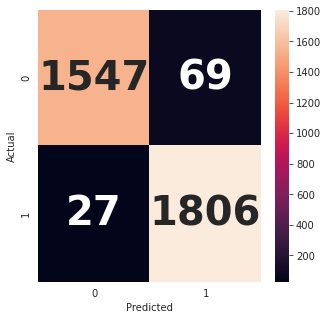

In [ ]:
confusion_matrix = pd.crosstab(y_testb, y_pred, rownames=['Actual'], colnames=['Predicted'])
fig, ax = plt.subplots(figsize=(5,5))
sns.heatmap(confusion_matrix, annot=True,annot_kws={"size": 40, "weight": "bold"}, fmt='d')

**RANDOM FOREST CLASSIFIER**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier(max_depth=2,n_estimators=100,max_features="sqrt")    #max_depth=log(no of features)
rf.fit(X_trainbs, y_trainb)

RandomForestClassifier(max_depth=2, max_features='sqrt')

In [ ]:
y_pred= rf.predict(X_testbs)

In [ ]:
from sklearn.metrics import f1_score
rf_f1=f1_score(y_testb,y_pred) 
print("f1 score for decision tree  :  ",round(rf_f1,2))

# we get good f1 score 

f1 score for decision tree  :   0.89


In [ ]:
#doing cross validation to get best value of max _depth to prevent overfitted model 
from sklearn.model_selection import cross_val_score 
from sklearn.ensemble import RandomForestClassifier
for depth in [1,2,3,4,5,6,7,8,9,10,20]:
  rf= RandomForestClassifier(max_depth=depth,n_estimators=100,max_features="sqrt")   # will tell the DT to not grow past the given threhsold
  # Fit dt to the training set
  rf.fit(X_trainbs, y_trainb) # the model is trained
  trainAccuracy = accuracy_score(y_trainb, rf.predict(X_trainbs)) # this is useless information - i am showing to prove a point
  rf= RandomForestClassifier(max_depth=depth,n_estimators=100,max_features="sqrt")   # a fresh model which is not trained yet
  valAccuracy = cross_val_score(rf, X_trainbs, y_trainb, cv=10) # syntax : cross_val_Score(freshModel,fts, target, cv= 10/5)
  print("Depth  : ", depth, " Training Accuracy : ", trainAccuracy, " Cross val score : " ,np.mean(valAccuracy))

Depth  :  1  Training Accuracy :  0.8252990213845596  Cross val score :  0.8264586814641991
Depth  :  2  Training Accuracy :  0.8922798115259152  Cross val score :  0.8852488150413553
Depth  :  3  Training Accuracy :  0.9420804639362088  Cross val score :  0.9365709766581538
Depth  :  4  Training Accuracy :  0.952953968829286  Cross val score :  0.949474204159704
Depth  :  5  Training Accuracy :  0.9647698441464299  Cross val score :  0.9610722956143393
Depth  :  6  Training Accuracy :  0.97042406669083  Cross val score :  0.9667987199293753
Depth  :  7  Training Accuracy :  0.9763682493657122  Cross val score :  0.9707130771090162
Depth  :  8  Training Accuracy :  0.9799202609641174  Cross val score :  0.9739030067997184
Depth  :  9  Training Accuracy :  0.9835447625951431  Cross val score :  0.9765850595369466
Depth  :  10  Training Accuracy :  0.9875317143892715  Cross val score :  0.9781074292440438
Depth  :  20  Training Accuracy :  1.0  Cross val score :  0.9862264190602307


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier(max_depth=4,n_estimators=100,max_features="sqrt")    #max_depth=log(no of features)
rf.fit(X_trainbs, y_trainb)

RandomForestClassifier(max_depth=4, max_features='sqrt')

In [ ]:
y_pred=rf.predict(X_testbs)

In [ ]:
y_pred   #gives either 1 or 0 

array([0, 0, 1, ..., 0, 1, 0])

In [ ]:
from sklearn.metrics import f1_score
rf_f1=f1_score(y_testb,y_pred) 
print("f1 score for random_forest_classifier  :  ",round(rf_f1,2))

# we get good f1 score 

f1 score for random_forest_classifier  :   0.96


In [ ]:
from sklearn.metrics import roc_auc_score
rf_auroc=roc_auc_score(y_testb,y_pred)
print("auroc score for random forest classifier   :  ",round(rf_auroc,2))

auroc score for random forest classifier   :   0.95


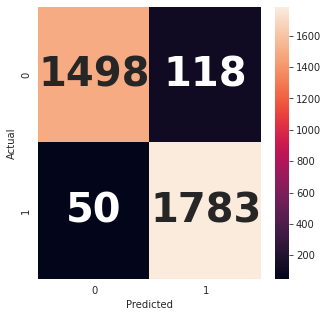

In [ ]:
confusion_matrix = pd.crosstab(y_testb, y_pred, rownames=['Actual'], colnames=['Predicted'])
fig, ax = plt.subplots(figsize=(5,5))
sns.heatmap(confusion_matrix, annot=True,annot_kws={"size": 40, "weight": "bold"}, fmt='d')

XGB CLASSIFIER

In [ ]:
import xgboost as xgb
from sklearn.model_selection import cross_val_score
import numpy as np
for lr in [0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1,0.11,0.12,0.13,0.14,0.15,0.2,0.5,0.7,1]:  #cross validation for learning rate 
  model = xgb.XGBClassifier(learning_rate = lr, n_estimators=100, verbosity = 0) # initialise the model
  model.fit(X_trainbs,y_trainb)
  print("Learning rate : ", lr," Train score : ", accuracy_score(y_trainb, model.predict(X_trainbs))," Cross-Val score : ", np.mean(cross_val_score(model, X_trainbs, y_trainb, cv=10)))

Learning rate :  0.01  Train score :  0.9452700253715114  Cross-Val score :  0.9388899223339745
Learning rate :  0.02  Train score :  0.9600579920260964  Cross-Val score :  0.9578827337600234
Learning rate :  0.03  Train score :  0.9635375135918811  Cross-Val score :  0.9615798572794823
Learning rate :  0.04  Train score :  0.9663646248640811  Cross-Val score :  0.963682042227617
Learning rate :  0.05  Train score :  0.9673069952881479  Cross-Val score :  0.9643345314289918
Learning rate :  0.06  Train score :  0.9689017760057992  Cross-Val score :  0.9657114481193052
Learning rate :  0.07  Train score :  0.9699891264951069  Cross-Val score :  0.9668713413416569
Learning rate :  0.08  Train score :  0.9702065965929685  Cross-Val score :  0.9671612489621759
Learning rate :  0.09  Train score :  0.9723088075389634  Cross-Val score :  0.9679587182478377
Learning rate :  0.1  Train score :  0.9735411380935122  Cross-Val score :  0.969625857847001
Learning rate :  0.11  Train score :  0.974

In [ ]:
model = xgb.XGBClassifier(learning_rate =0.08, n_estimators=100)  #at lr=0.08 model is more generalized
model.fit(X_trainbs,y_trainb) #train the model

XGBClassifier(learning_rate=0.08)

In [ ]:
y_pred=model.predict(X_testbs)

In [ ]:
y_pred  # we are getting predicted probablity for xgb

array([0, 0, 1, ..., 0, 1, 0])

In [ ]:
from sklearn.metrics import f1_score
xg_f1=f1_score(y_testb,y_pred) 
print("f1 score for xg boost  :  ",round(xg_f1,2))

# we get good f1 score 

f1 score for xg boost  :   0.98


In [ ]:
from sklearn.metrics import roc_auc_score
xg_auroc=roc_auc_score(y_testb,y_pred)  #handles predicted probaility 
print("auroc score for xg boost   :  ",round(xg_auroc,2))  #we get 0.99 very good auroc score 

auroc score for xg boost   :   0.97


In [ ]:
from sklearn.metrics import  confusion_matrix
confusion_matrix=confusion_matrix(y_testb,y_pred)

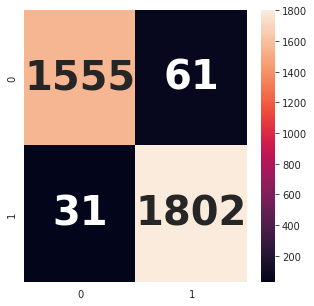

In [ ]:
fig, ax = plt.subplots(figsize=(5,5))
sns.heatmap(confusion_matrix, annot=True,annot_kws={"size": 40, "weight": "bold"}, fmt='d')

In [ ]:
bin_class=pd.DataFrame({"Model":["Logistic regression","KNN","Decision Tree","Random Forest","XGboost"],
                       "f1_score":[log_reg_f1,KNN_f1,dt_f1,rf_f1,xg_f1],
                       "auroc":[log_reg_auroc,KNN_auroc,dt_auroc,rf_auroc,xg_auroc]})

In [ ]:
print("Models and their evaluations")
print("\n")
bin_class.sort_values(["f1_score","auroc"],ascending=False)

Models and their evaluations




,Model,f1_score,auroc
1,KNN,0.978019,0.976074
4,XGboost,0.975108,0.972670
2,Decision Tree,0.974110,0.971286
3,Random Forest,0.955008,0.949851
0,Logistic regression,0.858547,0.849288


# Training the model for multi class classification

In [ ]:
df_failure.head()

,type,air_temperature,process_temperature,rotational_speed,torque,tool_wear,failure_type
50,1,298.9,309.1,2861,4.6,143,3
69,1,298.9,309.0,1410,65.7,191,3
77,1,298.8,308.9,1455,41.3,208,1
160,1,298.4,308.2,1282,60.7,216,2
161,1,298.3,308.1,1412,52.3,218,2


In [ ]:
#types of failure
df_failure["failure_type"].value_counts()  #there are 4 classes to predict

# 4 classes are {"Tool Wear Failure":1,"Overstrain Failure":2,"Power Failure":3,"Heat Dissipation Failure":4}

4    112
3     92
2     78
1     45
Name: failure_type, dtype: int64

**LOGISTIC REGRESSION**


In [ ]:
from sklearn.linear_model import LogisticRegression #main code that build the LR model 
logistic_regression= LogisticRegression() #initiating the model 
logistic_regression.fit(X_trainms,y_trainm) #training 

LogisticRegression()

In [ ]:
y_pred=logistic_regression.predict(X_testms)
y_pred

array([2, 2, 4, 3, 4, 4, 3, 4, 4, 4, 2, 3, 4, 3, 3, 2, 4, 4, 2, 2, 2, 3,
       4, 2, 4, 4, 4, 2, 1, 4, 4, 4, 2, 1, 1, 4, 4, 2, 4, 3, 4, 3, 3, 2,
       3, 4, 2, 4, 3, 4, 4, 2, 2, 4, 4, 4, 1, 3, 2, 1, 1, 3, 4, 2, 4, 4])

In [ ]:
from sklearn.metrics import f1_score
log_reg_f1=f1_score(y_testm,y_pred,average='weighted') 
print("f1 score for logistic regression :  ",round(log_reg_f1,2))

f1 score for logistic regression :   0.91


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_testm, y_pred))

              precision    recall  f1-score   support

           1       1.00      0.86      0.92         7
           2       0.82      0.93      0.87        15
           3       1.00      0.87      0.93        15
           4       0.90      0.93      0.92        29

    accuracy                           0.91        66
   macro avg       0.93      0.90      0.91        66
weighted avg       0.92      0.91      0.91        66



In [ ]:
from sklearn.metrics import  confusion_matrix
confusion_matrix(y_testm,y_pred)

array([[ 6,  0,  0,  1],
       [ 0, 14,  0,  1],
       [ 0,  1, 13,  1],
       [ 0,  2,  0, 27]])

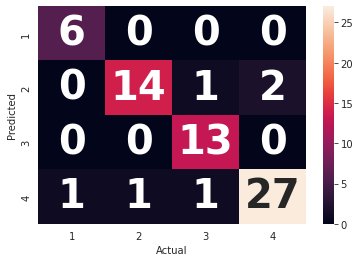

In [ ]:
confusion_matrix=pd.crosstab(y_pred,y_testm,rownames=["Predicted"],colnames=["Actual"])
sns.heatmap(confusion_matrix, annot=True,annot_kws={"size": 40, "weight": "bold"}, fmt='d')

**KNearestNeighhborClassifier**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
from sklearn.model_selection import cross_val_score
for i in [1,2,3,4,5,6,7,8,9,10,20,50]:  #for each k value finding the auroc 
  knn = KNeighborsClassifier(i) #initialising the model
  knn.fit(X_trainms,y_trainm) # training the model
  trainAccuracy = accuracy_score(y_trainm, knn.predict(X_trainms))
  print("K value  : " , i,"Train accuracy :",trainAccuracy, " cross val score : ", np.mean(cross_val_score(knn, X_trainms, y_trainm, cv=10)))

K value  :  1 Train accuracy : 1.0  cross val score :  0.8391737891737892
K value  :  2 Train accuracy : 0.9310344827586207  cross val score :  0.839031339031339
K value  :  3 Train accuracy : 0.9233716475095786  cross val score :  0.8427350427350426
K value  :  4 Train accuracy : 0.9157088122605364  cross val score :  0.8504273504273504
K value  :  5 Train accuracy : 0.9003831417624522  cross val score :  0.8428774928774929
K value  :  6 Train accuracy : 0.8850574712643678  cross val score :  0.8313390313390313
K value  :  7 Train accuracy : 0.8735632183908046  cross val score :  0.8274928774928775
K value  :  8 Train accuracy : 0.8773946360153256  cross val score :  0.8313390313390313
K value  :  9 Train accuracy : 0.842911877394636  cross val score :  0.797008547008547
K value  :  10 Train accuracy : 0.8659003831417624  cross val score :  0.8044159544159545
K value  :  20 Train accuracy : 0.7854406130268199  cross val score :  0.7739316239316238
K value  :  50 Train accuracy : 0.739

In [ ]:
# at k=10 we get good cross val score 
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=10)  #initialized 
classifier.fit(X_trainms,y_trainm)

KNeighborsClassifier(n_neighbors=10)

In [ ]:
y_pred=classifier.predict(X_testms)

In [ ]:
from sklearn.metrics import f1_score
KNN_f1=f1_score(y_testm,y_pred,average='weighted') 
print("f1 score for KNN  :  ",round(KNN_f1,2))

f1 score for KNN  :   0.85


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_testm, y_pred))

              precision    recall  f1-score   support

           1       1.00      0.71      0.83         7
           2       0.75      0.80      0.77        15
           3       1.00      0.73      0.85        15
           4       0.82      0.97      0.89        29

    accuracy                           0.85        66
   macro avg       0.89      0.80      0.84        66
weighted avg       0.87      0.85      0.85        66



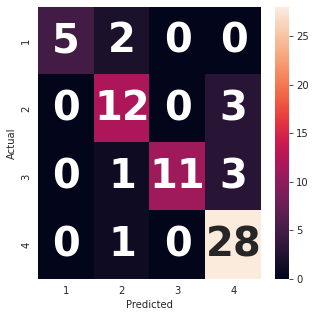

In [ ]:
confusion_matrix = pd.crosstab(y_testm, y_pred, rownames=['Actual'], colnames=['Predicted'])
fig, ax = plt.subplots(figsize=(5,5))
sns.heatmap(confusion_matrix, annot=True,annot_kws={"size": 40, "weight": "bold"}, fmt='d')

DECISION TREE CLASSIFIER 

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
#doing cross validation to get best value of max _depth to prevent overfitted model 
from sklearn.model_selection import cross_val_score 
from sklearn.tree import DecisionTreeClassifier
for depth in [1,2,3,4,5,6,7,8,9,10,20]:
  dt = DecisionTreeClassifier(max_depth=depth) # will tell the DT to not grow past the given threhsold
  # Fit dt to the training set
  dt.fit(X_trainms, y_trainm) # the model is trained
  trainAccuracy = accuracy_score(y_trainm, dt.predict(X_trainms)) # this is useless information - i am showing to prove a point
  dt = DecisionTreeClassifier(max_depth=depth) # a fresh model which is not trained yet
  valAccuracy = cross_val_score(dt, X_trainms, y_trainm, cv=10) # syntax : cross_val_Score(freshModel,fts, target, cv= 10/5)
  print("Depth  : ", depth, " Training Accuracy : ", trainAccuracy, " Cross val score : " ,np.mean(valAccuracy))

Depth  :  1  Training Accuracy :  0.5134099616858238  Cross val score :  0.5094017094017094
Depth  :  2  Training Accuracy :  0.8199233716475096  Cross val score :  0.8118233618233617
Depth  :  3  Training Accuracy :  0.8850574712643678  Cross val score :  0.842735042735043
Depth  :  4  Training Accuracy :  0.9425287356321839  Cross val score :  0.866096866096866
Depth  :  5  Training Accuracy :  0.9655172413793104  Cross val score :  0.8964387464387465
Depth  :  6  Training Accuracy :  0.9885057471264368  Cross val score :  0.8736467236467236
Depth  :  7  Training Accuracy :  1.0  Cross val score :  0.8850427350427349
Depth  :  8  Training Accuracy :  1.0  Cross val score :  0.8850427350427349
Depth  :  9  Training Accuracy :  1.0  Cross val score :  0.8850427350427349
Depth  :  10  Training Accuracy :  1.0  Cross val score :  0.8850427350427351
Depth  :  20  Training Accuracy :  1.0  Cross val score :  0.8816239316239317


In [ ]:
#lets us fit the model with max_depth =2 it seems more of genralised model   in depth>5 we see overfitted model 
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=2)
dt.fit(X_trainms, y_trainm) 

DecisionTreeClassifier(max_depth=2)

In [ ]:
y_pred = dt.predict(X_testms) 

In [ ]:
from sklearn.metrics import f1_score
dt_f1=f1_score(y_testm,y_pred,average='weighted') 
print("f1 score for decision tree  :  ",round(dt_f1,2))

f1 score for decision tree  :   0.8


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_testm, y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         7
           2       0.65      1.00      0.79        15
           3       0.91      0.67      0.77        15
           4       0.84      0.72      0.78        29

    accuracy                           0.80        66
   macro avg       0.85      0.85      0.83        66
weighted avg       0.83      0.80      0.80        66



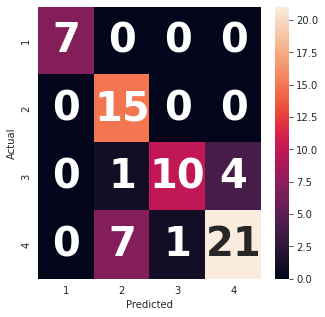

In [ ]:
confusion_matrix = pd.crosstab(y_testm, y_pred, rownames=['Actual'], colnames=['Predicted'])
fig, ax = plt.subplots(figsize=(5,5))
sns.heatmap(confusion_matrix, annot=True,annot_kws={"size": 40, "weight": "bold"}, fmt='d')

RANDOM FOREST CLASSIFIER

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier(max_depth=2,n_estimators=100,max_features="sqrt")    #max_depth=log(no of features)
rf.fit(X_trainms, y_trainm)

RandomForestClassifier(max_depth=2, max_features='sqrt')

In [ ]:
y_pred= rf.predict(X_testms)

In [ ]:
from sklearn.metrics import f1_score
rf_f1=f1_score(y_testm,y_pred,average='weighted') 
print("f1 score for decision tree  :  ",round(rf_f1,2))

f1 score for decision tree  :   0.86


In [ ]:
#doing cross validation to get best value of max _depth to prevent overfitted model 
from sklearn.model_selection import cross_val_score 
from sklearn.ensemble import RandomForestClassifier
for depth in [1,2,3,4,5,6,7,8,9,10,20]:
  rf= RandomForestClassifier(max_depth=depth,n_estimators=100,max_features="sqrt")   # will tell the DT to not grow past the given threhsold
  # Fit dt to the training set
  rf.fit(X_trainms, y_trainm) # the model is trained
  trainAccuracy = accuracy_score(y_trainm, rf.predict(X_trainms)) # this is useless information - i am showing to prove a point
  rf= RandomForestClassifier(max_depth=depth,n_estimators=100,max_features="sqrt")   # a fresh model which is not trained yet
  valAccuracy = cross_val_score(rf, X_trainms, y_trainm, cv=10) # syntax : cross_val_Score(freshModel,fts, target, cv= 10/5)
  print("Depth  : ", depth, " Training Accuracy : ", trainAccuracy, " Cross val score : " ,np.mean(valAccuracy))

Depth  :  1  Training Accuracy :  0.7049808429118773  Cross val score :  0.6933048433048434
Depth  :  2  Training Accuracy :  0.842911877394636  Cross val score :  0.8351851851851853
Depth  :  3  Training Accuracy :  0.9157088122605364  Cross val score :  0.8504273504273504
Depth  :  4  Training Accuracy :  0.9616858237547893  Cross val score :  0.8810541310541311
Depth  :  5  Training Accuracy :  0.9885057471264368  Cross val score :  0.9078347578347579
Depth  :  6  Training Accuracy :  0.9923371647509579  Cross val score :  0.8964387464387465
Depth  :  7  Training Accuracy :  1.0  Cross val score :  0.9155270655270655
Depth  :  8  Training Accuracy :  1.0  Cross val score :  0.903988603988604
Depth  :  9  Training Accuracy :  1.0  Cross val score :  0.9078347578347579
Depth  :  10  Training Accuracy :  1.0  Cross val score :  0.9041310541310542
Depth  :  20  Training Accuracy :  1.0  Cross val score :  0.903846153846154


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier(max_depth=4,n_estimators=100,max_features="sqrt")    
rf.fit(X_trainms, y_trainm)

RandomForestClassifier(max_depth=4, max_features='sqrt')

In [ ]:
y_pred=rf.predict(X_testms)

In [ ]:
from sklearn.metrics import f1_score
rf_f1=f1_score(y_testm,y_pred,average='weighted') 
print("f1 score for random_forest_classifier  :  ",round(rf_f1,2))

f1 score for random_forest_classifier  :   0.93


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_testm, y_pred))

              precision    recall  f1-score   support

           1       1.00      0.86      0.92         7
           2       0.83      1.00      0.91        15
           3       0.88      0.93      0.90        15
           4       1.00      0.90      0.95        29

    accuracy                           0.92        66
   macro avg       0.93      0.92      0.92        66
weighted avg       0.93      0.92      0.93        66



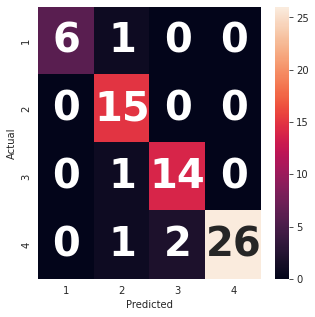

In [ ]:
confusion_matrix = pd.crosstab(y_testm, y_pred, rownames=['Actual'], colnames=['Predicted'])
fig, ax = plt.subplots(figsize=(5,5))
sns.heatmap(confusion_matrix, annot=True,annot_kws={"size": 40, "weight": "bold"}, fmt='d')

XGB CLASSIFIER

In [ ]:
import xgboost as xgb
from sklearn.model_selection import cross_val_score
import numpy as np
for lr in [0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1,0.11,0.12,0.13,0.14,0.15,0.2,0.5,0.7,1]:  #cross validation for learning rate 
  model = xgb.XGBClassifier(learning_rate = lr, n_estimators=100, verbosity = 0,objective="multi:softprob") # initialise the model
  model.fit(X_trainms,y_trainm)
  print("Learning rate : ", lr," Train score : ", accuracy_score(y_trainm, model.predict(X_trainms))," Cross-Val score : ", np.mean(cross_val_score(model, X_trainms, y_trainm, cv=10)))

Learning rate :  0.01  Train score :  0.9501915708812261  Cross-Val score :  0.8925925925925927
Learning rate :  0.02  Train score :  0.9616858237547893  Cross-Val score :  0.9078347578347579
Learning rate :  0.03  Train score :  0.9808429118773946  Cross-Val score :  0.903988603988604
Learning rate :  0.04  Train score :  0.9808429118773946  Cross-Val score :  0.903988603988604
Learning rate :  0.05  Train score :  0.9923371647509579  Cross-Val score :  0.903988603988604
Learning rate :  0.06  Train score :  0.9961685823754789  Cross-Val score :  0.9078347578347579
Learning rate :  0.07  Train score :  0.9961685823754789  Cross-Val score :  0.9116809116809117
Learning rate :  0.08  Train score :  1.0  Cross-Val score :  0.907977207977208
Learning rate :  0.09  Train score :  1.0  Cross-Val score :  0.9041310541310542
Learning rate :  0.1  Train score :  1.0  Cross-Val score :  0.9002849002849004
Learning rate :  0.11  Train score :  1.0  Cross-Val score :  0.907977207977208
Learning r

In [ ]:
model = xgb.XGBClassifier(learning_rate =0.03, n_estimators=100,objective='multi:softprob',verbose=0)  #at lr=0.01 model is more generalized
model.fit(X_trainms,y_trainm) #train the model

XGBClassifier(learning_rate=0.03, objective='multi:softprob', verbose=0)

In [ ]:
y_pred=model.predict(X_testms)

In [ ]:
y_pred

array([2, 2, 4, 3, 4, 4, 3, 4, 4, 4, 2, 3, 4, 3, 3, 2, 4, 4, 2, 2, 2, 3,
       4, 2, 4, 4, 3, 2, 1, 3, 4, 4, 4, 1, 1, 2, 4, 2, 4, 3, 4, 3, 3, 2,
       3, 4, 2, 4, 3, 4, 4, 2, 3, 4, 4, 4, 1, 3, 2, 1, 1, 3, 4, 4, 4, 1])

In [ ]:
from sklearn.metrics import f1_score
xg_f1=f1_score(y_testm,y_pred,average='weighted') 
print("f1 score for xg boost  :  ",round(xg_f1,2))

# we get good f1 score 

f1 score for xg boost  :   0.94


In [ ]:
from sklearn.metrics import  confusion_matrix
confusion_matrix=confusion_matrix(y_testm,y_pred)
confusion_matrix

array([[ 7,  0,  0,  0],
       [ 0, 14,  0,  1],
       [ 0,  1, 14,  0],
       [ 0,  0,  2, 27]])

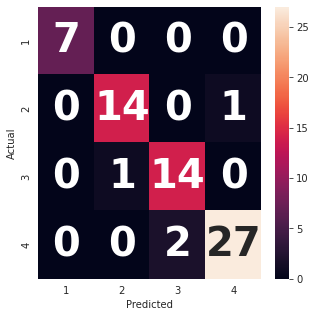

In [ ]:
confusion_matrix = pd.crosstab(y_testm, y_pred, rownames=['Actual'], colnames=['Predicted'])
fig, ax = plt.subplots(figsize=(5,5))
sns.heatmap(confusion_matrix, annot=True,annot_kws={"size": 40, "weight": "bold"}, fmt='d')

In [ ]:
multi_class=pd.DataFrame({"Model":["Logistic regression","KNN","Decision Tree","Random Forest","XGboost"],
                       "f1_score":[log_reg_f1,KNN_f1,dt_f1,rf_f1,xg_f1]})

In [ ]:
print("Models and their evaluations")
print("\n")
multi_class.sort_values(["f1_score"],ascending=False)

Models and their evaluations




,Model,f1_score
4,XGboost,0.939728
3,Random Forest,0.925219
0,Logistic regression,0.909962
1,KNN,0.847217
2,Decision Tree,0.802062
